SNR=10dB


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 5/5 [00:30<00:00,  6.13s/it]


SNR=11dB


100%|██████████| 5/5 [00:31<00:00,  6.31s/it]


SNR=12dB


100%|██████████| 5/5 [00:32<00:00,  6.47s/it]


SNR=13dB


100%|██████████| 5/5 [00:32<00:00,  6.59s/it]


SNR=14dB


100%|██████████| 5/5 [00:32<00:00,  6.55s/it]


SNR=5dB


100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


SNR=6dB


100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


SNR=7dB


100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


SNR=8dB


100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


SNR=9dB


100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


SNR=10dB


100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


SNR=11dB


100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


SNR=12dB


100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


SNR=13dB


100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


SNR=14dB


100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


SNR=5dB


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


SNR=6dB


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


SNR=7dB


100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


SNR=8dB


100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


SNR=9dB


100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


SNR=10dB


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


SNR=11dB


100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


SNR=12dB


100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


SNR=13dB


100%|██████████| 5/5 [00:02<00:00,  2.16it/s]


SNR=14dB


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


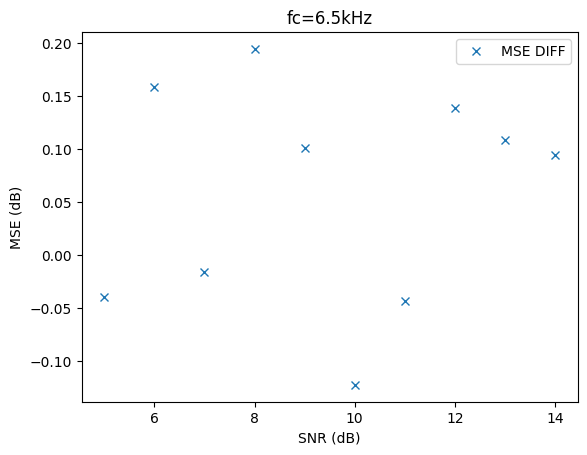

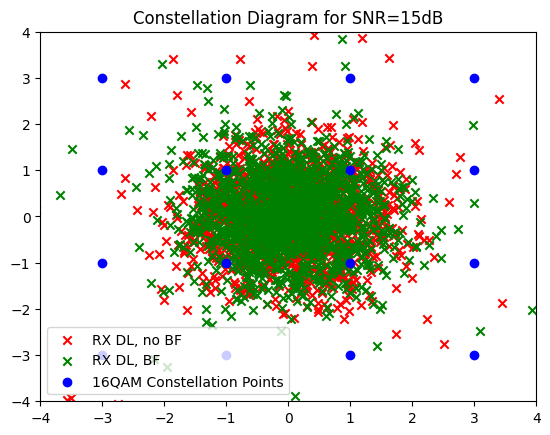

In [1]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt
from downlink import downlink

fc = 6.5e3
# Design with one tx (AWGN LOS), then with tx + reflect
My_bf_1 = bf_multichannel_const(6.5e3, 1, 1, 1)
My_bf_1.reflection_list = np.array([1])
My_bf_1.x_tx_list = np.array([5])
My_bf_1.y_tx_list = np.array([5])

My_bf_2 = bf_multichannel_const(6.5e3, 2, 1, 1) #still unclear on that second variable
My_bf_2.reflection_list = np.array([1,0.5])
My_bf_2.x_tx_list = np.array([5,15])
My_bf_2.y_tx_list = np.array([5,5])

theta_bf_1, wk_1, S_theta_1 = My_bf_1.simulation()
theta_bf_2, wk_2, S_theta_2 = My_bf_2.simulation() 

# run this 4 times -> no bf, no reflect; no bf, reflect; bf, no reflect; bf, reflect;
My_ue_nobf_1 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False)
My_ue_nobf_1.reflection_list = np.array([1])
My_ue_nobf_1.x_rx_list = np.array([5])
My_ue_nobf_1.y_rx_list = np.array([5])
My_ue_nobf_1.simulation()
mse_no_bf_1 = My_ue_nobf_1.mean_mse
symbolset_no_bf_1 = My_ue_nobf_1.mean_symbols[-1,:]

My_ue_nobf_2 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False) #should you change the 2nd variable?
My_ue_nobf_2.reflection_list = np.array([1,0.5])
My_ue_nobf_2.x_rx_list = np.array([5,15])
My_ue_nobf_2.y_rx_list = np.array([5,5])
My_ue_nobf_2.simulation()
mse_no_bf_2 = My_ue_nobf_2.mean_mse
symbolset_no_bf_2 = My_ue_nobf_2.mean_symbols[-1,:]

My_ue_bf_1 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=True)
My_ue_bf_1.reflection_list = np.array([1])
My_ue_bf_1.x_rx_list = np.array([5])
My_ue_bf_1.y_rx_list = np.array([5])
My_ue_bf_1.simulation()
mse_bf_1 = My_ue_bf_1.mean_mse
symbolset_bf_1 = My_ue_bf_1.mean_symbols[-1,:]

My_ue_bf_2 = downlink(6.5e3, 1, 1, theta=theta_bf_2, wk=wk_2, apply_bf=True)
My_ue_bf_2.reflection_list = np.array([1,0.5])
My_ue_bf_2.x_rx_list = np.array([5,15])
My_ue_bf_2.y_rx_list = np.array([5,5])
My_ue_bf_2.simulation()
mse_bf_2 = My_ue_bf_2.mean_mse
symbolset_bf_1 = My_ue_bf_2.mean_symbols[-1,:]


# equalizer taps
true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))

# S_theta Plots
plt.figure(1)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(np.linspace(-90,90,len(S_theta_1)), S_theta_1)
plt.xlabel('angle (deg)')
plt.ylabel('value')
ax1.set_title('Channel Response, No Reflect')
ax2.plot(np.linspace(-90,90,len(S_theta_2)), S_theta_2)
ax2.set_title('Channel Response, Reflect')
plt.show()

# D0 plots -> later

# SNR/MSE Plots
plt.figure(2)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(My_ue_nobf_1.snr_list, mse_no_bf_1, 'x')
ax1.plot(My_ue_bf_1.snr_list, mse_bf_1, 'o')
plt.legend (['No BF', 'BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
ax1.set_title('MSE for Downlink Beamformer, No Reflect')
ax2.plot(My_ue_nobf_2.snr_list, mse_no_bf_2, 'x')
ax2.plot(My_ue_bf_2.snr_list, mse_bf_2, 'o')
ax2.set_title('MSE for Downlink Beamformer, Reflect')
plt.show

"""
plt.figure()
plt.plot(My_ue_nobf.snr_list, mse_bf, 'x')
plt.axhline(y=0, color='r', linestyle='-')
#plt.plot(My_ue.snr_list, mse_bf[:], 'x')
plt.legend (['MSE']) #(['MSE, No BF', 'MSE, BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
plt.title(f'fc={fc/1000:.1f}kHz')
plt.show()


fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c='r', marker='x')
ax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""